# Week 2 Lab

This notebook includes all the code snippets in the lab notes for Week 2, asz copying-and-pasting from the PDF often fails.

In [2]:
# Load the libraries we'll use
######################################

# Basic numerics
import numpy as np
import scipy as sp
import scipy.stats as st

# Data handling
import pandas as pd

# Suppress certain irrelevant warnings generated by the graphics libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

# Statistical modelling tools
import statsmodels.api as sm

## Read the earthquake data

Look at the full dataset `df` and try to understand the meaning of the various columns (in theory the dataset should be accompanied by an explanation of what it contains). Can you spot any missing data?

You do not have to write anything now, but think of what you would write if you had to produce a report about these data. Also, imagine standing up in front of an audience to present an inroductory analysis. What would you point out about these data? And what would you say about the methods you are going to use next to study this data? Take inspiration from the slides in the lecture.

In [3]:
# Read the data
df = pd.read_csv('earthquakes_US_14Jul-13Aug_2018.csv') 
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2018-08-13T20:32:00.830Z,33.860333,-117.501167,1.50,1.56,ml,29.0,44.0,0.06337,0.2600,...,2018-08-13T20:35:51.429Z,"3km SE of Home Gardens, CA",quarry blast,0.38,0.71,0.213,37.0,automatic,ci,ci
1,2018-08-13T20:15:08.350Z,33.523667,-116.747333,3.69,0.40,ml,14.0,90.0,0.04246,0.0800,...,2018-08-13T20:18:36.325Z,"8km WSW of Anza, CA",earthquake,0.18,0.42,0.137,9.0,automatic,ci,ci
2,2018-08-13T20:11:13.973Z,40.601000,-115.955500,0.00,2.20,ml,12.0,108.3,0.43800,0.1944,...,2018-08-13T20:28:20.650Z,"17km SE of Carlin, Nevada",explosion,NaN,0.00,0.080,8.0,reviewed,nn,nn
3,2018-08-13T20:09:39.080Z,33.482333,-116.744333,7.91,0.34,ml,18.0,65.0,0.06527,0.1800,...,2018-08-13T20:13:23.288Z,"10km SW of Anza, CA",earthquake,0.35,0.86,0.093,8.0,automatic,ci,ci
4,2018-08-13T19:59:26.490Z,33.491167,-116.795500,2.54,0.39,ml,11.0,109.0,0.08857,0.0800,...,2018-08-13T20:02:57.234Z,"8km NE of Aguanga, CA",earthquake,0.26,0.37,0.055,8.0,automatic,ci,ci


## Visualise the distribution of the magnitudes

In [4]:
# Extract the data for magnitudes into an array
x = df.mag.to_numpy()

No matter which software you use, think about having to explain someone else which visualisation is lossless or lossy, and why. Also, this is often overlooked, especially when you are in a hurry, but ensure all your graphs have **titles**, **labels on the axes** and if need be, **keys** or **legends** to explain  plotting conventions.

#### Seaborn's `displot()`

Run the command `sns.displot( x )` and look at the result. In which ways does it differ from the graph
produced in the lecture slides? Check the code in `earth.ipynb` to see how to customise your plot and what the different lines of code do.

Explore the way that `displot()` works: there's a helpful
[tutorial](https://seaborn.pydata.org/tutorial/distributions.html) provided by Seaborn's developers. Play around with the parameters, for example changing the number of bins using `bins = 8`, or specifying the bin edges, to achieve unequal bin sizes (e.g. `bins = [0,0.5,2,5]`).


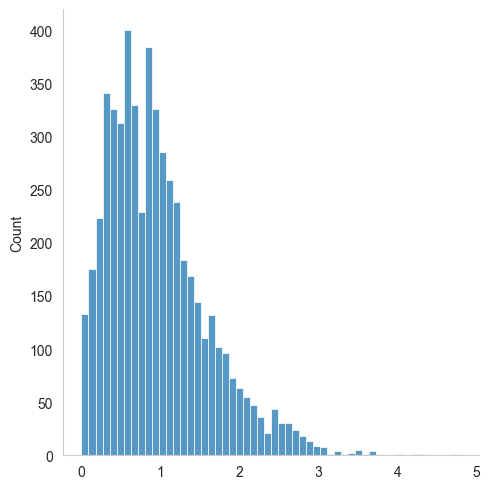

In [5]:
# Visualisation
sns.displot( x )

One can also use `displot()` to combine a rug plot, histogram and the kernel density plot in a single figure:

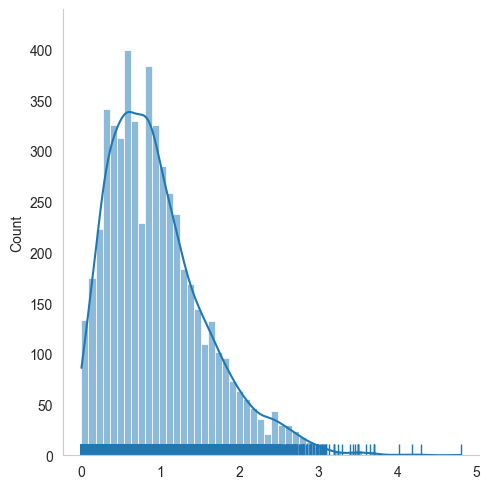

In [6]:
sns.displot( x, kde=True, rug=True )

How would you do a jitter plot in Python? There is a related example in the notebook for Week&nbsp;1's analysis of the data from Two Truths and a Lie.

#### Working with histograms using `NumPy` and `Matplotlib`

Another, more flexible alternative to plot the histogram is to find the $x$- and $y$-values that specify the bars with the command 

`yh,xh = np.histogram(x,n,density=True)`, 

where `x` is the data and `n` is the number of bins.

In [7]:
# Getting bin heights and boundaries with NumPy's histogram() function
n = 50 # number of bins
yh,xh = np.histogram(x,n,density=True)

What does the vector `xh` contain? How long is it? What does `yh` contain? How long is it? Why do you think they are not of the same length? To make them of the same length you will have to add an extra value to the `yh` vector using the function `np.concatenate((vector1,vector2))`, which is documented [here](https://numpy.org/doc/1.25/reference/generated/numpy.concatenate.html). 

To plot only the &ldquo;outline&rdquo; of the histogram (useful if you want to plot two or more histograms on top of each other), use the function `plt.step()`, e.g.:

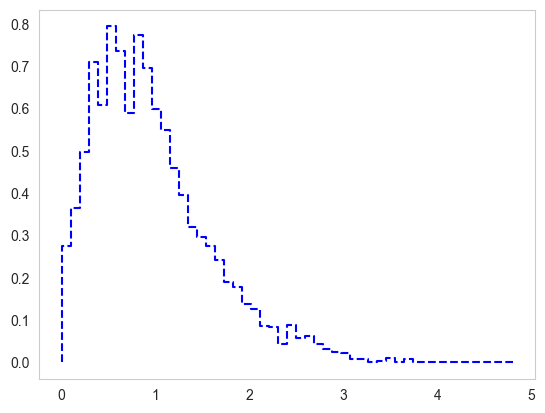

In [8]:
# Plot the outline of the histogram
plt.step(xh,np.concatenate(([0.],yh)),'b',linestyle='dashed')

In these histograms, what does `density=True` do? Try computing `np.sum(yh)`: why is it not equal to 1? Try `density=False`: what are the values of `yh` now?

#### Draw a KDE using tools from `statsmodels`

For more flexibility in plotting the kernel density and to be able to choose different kernels we use
the following commands, where the first line initializes a univariate kernel density estimator and the second computes the values of the fitted kernel at many points on the $x$-axis (the option `fft` needs to be `False`, except for in the case of the Gaussian kernel). Other kernel options are `tri` for the triangular and `gau` for the Gaussian one.

Here again, the developers have provided a helpful
[tutorial](https://docs.w3cub.com/statsmodels/examples/notebooks/generated/kernel_density/).

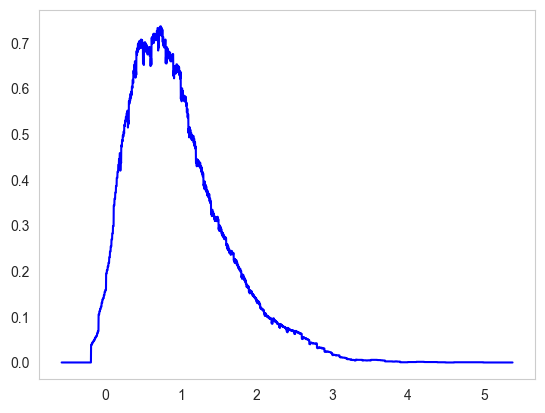

In [9]:
# Get x and y coords of a KDE (with uniform kernel) using tools from statsmodels
mykdeu = sm.nonparametric.KDEUnivariate(x) 
mykdeu.fit(kernel="uni",fft=False) 
xu = mykdeu.support 
yu = mykdeu.density 
plt.plot(xu,yu,'b')

Finally, play with different numerical values for the option bw, the width of the kernel. For example, try overlaying in different colours the kernel densities obtained for values of `bw` from the list `[0.02,0.05,0.2,0.5,2]`. Which values do you think are &lsquo;sensible&rsquo;?

## Measures of central tendency and higher moments

One can compute the mean and median with the functions `np.mean()` and `np.median()`:

In [10]:
(np.mean(x), np.median(x))

(0.9555100148367953, 0.83)

The most difficult measure of central tendency to compute is the mode because it is estimated from the kernel density estimate:

0.5960224782501898

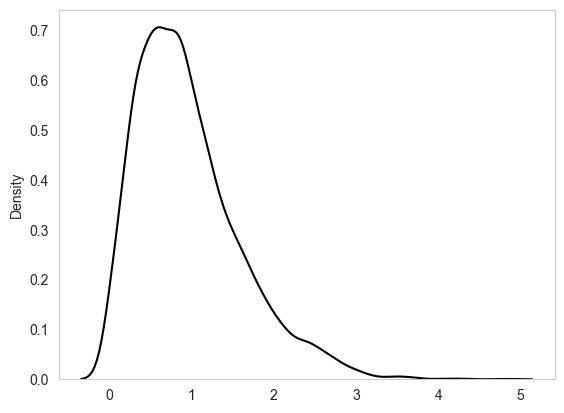

In [11]:
# Estimating the mode with a KDE
mykde = sns.kdeplot(x,color='black') 
xm,ym = mykde.get_lines()[0].get_data() 
mo = xm[np.argmax(ym)]
mo

Determine what these commands do, then add a vertical bar for each measure of central tendency on top to the KDE plot. If you can't see how to do this, look at the notebook `earth.ipynb`.

Next, compute variance (for an unbiased estimate, use `np.var(x,ddof=1)`), as well as the standard deviation, skewness and kurtosis using Python commands. Some of the tools you need are available in `scipy.stats` (note that `moment(x,n)` computes the $n$-th central moment, but doesn't standardise it). If you know enough python to do so, verify that the computations are correct repeating the them using the basic definitions of these quantities in terms of sums over the data. How would you find the median from the basic definition?

In [12]:
# Unbiased estimate of the variance
np.var(x,ddof=1)

0.40033129242426246

See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.moment.html#scipy.stats.moment) for `scipy.stats.moment()` and related functions.

## Empirical Cumulative Distribution Function and Survival Function

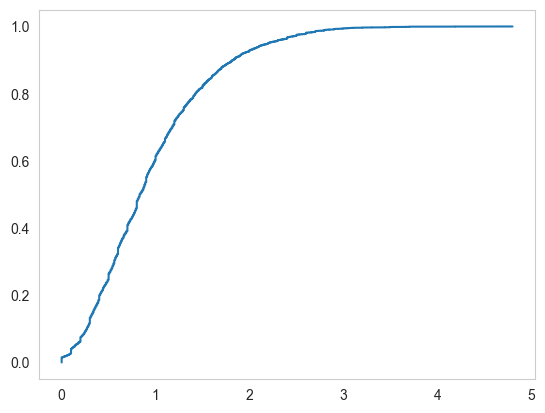

In [13]:
# Ensure that we have imported the ECDF function ...
from statsmodels.distributions.empirical_distribution import ECDF

# ... then plot the ECDF.
ecdf=ECDF(x)
plt.step(ecdf.x,ecdf.y)

How would you plot the survival function? To explore the tail of the distribution use the option `plt.yscale('log')`.

Finally, find some of the most commonly-reported percentiles percentiles and the interquartile range, and plot them on top the KDE. If you can't see how to do this, look at the notebook `earth.ipynb`.